In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import tensorflow as tf

In [ ]:
dataset_path = '/content/drive/MyDrive/data_processed_20221127.csv'
df = pd.read_csv(dataset_path)
df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.219248,0.202358,0.197777,0.204829,0.215495,0.228398,0.238036,0.245185,0.246863,0.240501,...,0.852468,0.852332,0.850162,0.849845,0.857028,0.832852,0.786638,0.767195,0.736329,0
1,0.211296,0.200984,0.201180,0.209728,0.219609,0.230679,0.237117,0.241778,0.242004,0.236709,...,0.890723,0.877640,0.864760,0.851563,0.826911,0.785522,0.703186,0.666190,0.602996,0
2,0.201368,0.211247,0.230338,0.250343,0.263710,0.272886,0.266973,0.261052,0.260747,0.263003,...,0.922992,0.908561,0.893537,0.877603,0.846811,0.801268,0.710651,0.669533,0.598613,0
3,0.216260,0.228285,0.246037,0.261653,0.270568,0.276162,0.271358,0.270516,0.276171,0.277690,...,0.780388,0.776961,0.772020,0.767475,0.758772,0.727433,0.662957,0.634216,0.585556,0
4,0.235849,0.228444,0.226685,0.228685,0.231497,0.235546,0.238009,0.243287,0.251936,0.251289,...,0.928955,0.914972,0.900167,0.884510,0.854712,0.809537,0.719890,0.679254,0.609244,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.298747,0.301272,0.285649,0.251744,0.215929,0.176953,0.147845,0.132033,0.136158,0.133235,...,0.861200,0.866182,0.864821,0.864132,0.867506,0.839527,0.783542,0.758409,0.715527,2
496,0.186119,0.182905,0.190441,0.205658,0.221099,0.240868,0.259256,0.274624,0.292615,0.298997,...,0.794401,0.806324,0.809077,0.812088,0.819486,0.793894,0.739869,0.714979,0.671416,2
497,0.285717,0.303970,0.323849,0.336689,0.341612,0.345244,0.350928,0.356150,0.363033,0.375454,...,0.782143,0.766240,0.752462,0.737565,0.702689,0.658261,0.565828,0.523625,0.450315,2
498,0.103199,0.107305,0.117616,0.129981,0.139425,0.146977,0.143781,0.146450,0.157137,0.165279,...,0.800768,0.805984,0.805872,0.806503,0.810392,0.784037,0.729691,0.705235,0.663363,2


In [ ]:
x = df.drop(columns=['label']).to_numpy()
y = df['label'].to_numpy()
y = tf.keras.utils.to_categorical(y)
print(x.shape, y.shape)

(500, 200) (500, 3)


# Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(x, y, random_state=0, stratify=y)
print("train: ", x_train.shape, y_train.shape)
print("test: ", x_test.shape, y_test.shape)

train:  (375, 200) (375, 3)
test:  (125, 200) (125, 3)


# Create Model

In [ ]:
input_shape = x_train.shape[1]
input_shape

In [14]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=input_shape),
  tf.keras.layers.Dense(256),
  tf.keras.layers.ReLU(),
  tf.keras.layers.Dense(512),
  tf.keras.layers.ReLU(),
  tf.keras.layers.Dense(32),
  tf.keras.layers.ReLU(),
  tf.keras.layers.Dense(3),
  tf.keras.layers.Softmax()
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=25, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[callback], verbose=0)

In [ ]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 256)               51456     
                                                                 
 re_lu_33 (ReLU)             (None, 256)               0         
                                                                 
 dense_86 (Dense)            (None, 512)               131584    
                                                                 
 re_lu_34 (ReLU)             (None, 512)               0         
                                                                 
 dense_87 (Dense)            (None, 32)                16416     
                                                                 
 re_lu_35 (ReLU)             (None, 32)                0         
                                                                 
 dense_88 (Dense)            (None, 3)               

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

4/4 - 0s - loss: 0.0027 - accuracy: 1.0000 - 36ms/epoch - 9ms/step


[0.0026629199273884296, 1.0]

4/4 [==============================] - 0s 3ms/step


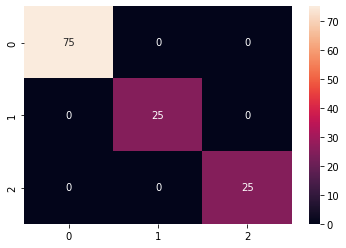

In [ ]:
y_pred = model.predict(x_test)
y_test_label = np.argmax(y_test, axis=1)
y_pred_label = np.argmax(y_pred, axis=1)
confusion_matrix = skl.metrics.confusion_matrix(y_test_label, y_pred_label)
sns.heatmap(confusion_matrix, annot=True)

# Overfit and Underfit

In [ ]:
history_df = pd.DataFrame.from_dict(history.history)
history_df.reset_index(inplace=True)
history_df.rename(columns={'index': 'epoch'}, inplace=True)
history_df

,epoch,loss,accuracy,val_loss,val_accuracy
0,0,0.685116,0.666667,0.337599,0.866667
1,1,0.414465,0.836667,0.296743,0.920000
2,2,0.384877,0.850000,0.301117,0.866667
3,3,0.373509,0.840000,0.274239,0.893333
4,4,0.365656,0.853333,0.307194,0.853333
...,...,...,...,...,...
149,149,0.033580,0.983333,0.010440,1.000000
150,150,0.017106,0.996667,0.013919,1.000000
151,151,0.006981,1.000000,0.003228,1.000000
152,152,0.006246,1.000000,0.004524,1.000000


In [ ]:
loss_df = history_df[['epoch', 'loss', 'val_loss']]
loss_df.columns = ['epoch', 'train', 'validation']
loss_df = loss_df.melt(id_vars=['epoch'], var_name='split')
loss_df

,epoch,split,value
0,0,train,0.685116
1,1,train,0.414465
2,2,train,0.384877
3,3,train,0.373509
4,4,train,0.365656
...,...,...,...
303,149,validation,0.010440
304,150,validation,0.013919
305,151,validation,0.003228
306,152,validation,0.004524


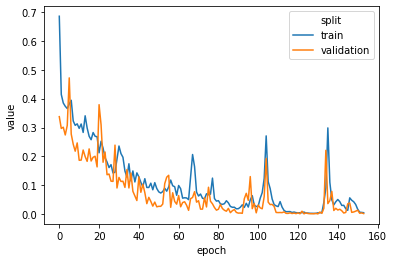

In [ ]:
sns.lineplot(data=loss_df, x='epoch', y='value', hue='split')